# **CP322 Machine Learning Project**  
**Title:** Predicting Students' Dropout and Academic Success  
**Project Team:** Arsalan Khan *(210862640)* & Aliha Ali *(210184090)*   
**Dataset:** Predict Students' Dropout and Academic Success  
**Due Date:** December 13th, 2024  

---

## **Introduction**  

In higher education, identifying students at risk of dropout is a critical challenge. Early intervention can significantly improve academic success rates, reduce student attrition, and support institutional decision-making. The dataset chosen for this project, *"Predict Students' Dropout and Academic Success,"* originates from a Portuguese higher education institution and includes comprehensive data about students' academic performance, demographics, and socioeconomic factors.

The primary objective of this project is to **predict student outcomes**—whether they will **drop out**, remain **enrolled**, or successfully **graduate**—by leveraging machine learning techniques. This problem is framed as a **multi-class classification task** with three categories:

- **Dropout (0)**  
- **Enrolled (1)**  
- **Graduate (2)**  

---

### **Key Project Goals**  

1. Cleaning and preprocessing the dataset to ensure it is ready for analysis.  
2. Performing **Exploratory Data Analysis (EDA)** to identify feature relationships and trends.  
3. Addressing **class imbalance** to ensure fair model predictions.  
4. Building and evaluating machine learning models, including:  
   - Logistic Regression  
   - Decision Tree  
   - Random Forest  
   - Support Vector Machine (SVM)  
   - Neural Networks  
5. Drawing data-driven conclusions and providing actionable insights to reduce student dropout rates and improve academic outcomes.  

---

This report presents a step-by-step **machine learning pipeline**—from data exploration to model evaluation—along with insights derived from the results and recommendations for future work.  


---

## **Table of Contents**  

1. **Import Libraries and Load Data**  
2. **Data Exploration and Preprocessing**  
   - 2.1 Inspect the Data  
   - 2.2 Handle Missing Values  
   - 2.3 Encode Categorical Variables  
   - 2.4 Feature Scaling  
3. **Exploratory Data Analysis (EDA)**  
   - 3.1 Univariate Analysis  
   - 3.2 Bivariate Analysis  
   - 3.3 Feature Relationships  
4. **Handling Class Imbalance**  
   - 4.1 Analyze Class Distribution  
   - 4.2 Resampling Techniques  
5. **Feature Engineering and Selection**  
   - 5.1 Feature Importance  
6. **Model Building**  
   - 6.1 Split the Data  
   - 6.2 Basic Models  
     - 6.2.1 Logistic Regression  
     - 6.2.2 Decision Tree  
   - 6.3 Advanced Models  
     - 6.3.1 Random Forest  
     - 6.3.2 Support Vector Machine  
     - 6.3.3 Neural Network  
7. **Model Evaluation**  
   - 7.1 Evaluate Models  
   - 7.2 Model Evaluations  
8. **Hyperparameter Tuning**  
   - 8.1 Grid Search for Random Forest  
   - 8.2 Evaluate Tuned Random Forest  
9. **Conclusion**  

---  

## **1. Import Libraries and Load Data**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

# Read and clean the CSV file
data = pd.read_csv('data.csv', sep=';', quotechar='"', engine='python')

# Clean column names
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(r'[\t\n\r]', '', regex=True)
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('"', '')
data.columns = data.columns.str.replace("'", '')
data.columns = data.columns.str.replace(r'[()/]', '_', regex=True)
data.columns = data.columns.str.replace('__', '_')

# Display column names
print(data.columns.tolist())


['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade_', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited_', 'Curricular_units_1st_sem_enrolled_', 'Curricular_units_1st_sem_evaluations_', 'Curricular_units_1st_sem_approved_', 'Curricular_units_1st_sem_grade_', 'Curricular_units_1st_sem_without_evaluations_', 'Curricular_units_2nd_sem_credited_', 'Curricular_units_2nd_sem_enrolled_', 'Curricular_units_2nd_sem_evaluations_', 'Curricular_units_2nd_sem_approved_', 'Curricular_units_2nd_sem_grade_', 'Curricular_units_2nd_sem_without_evaluations_', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target']


## **2. Data Exploration and Preprocessing**  
### **2.1 Inspect the Data**

In [ ]:
# View first few rows
display(data.head())

# Check data types and missing values
data.info()

# Summary statistics
display(data.describe())

# Display the column names
print(data.columns.tolist())

# Check data types
print(data.dtypes)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade_,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited_,Curricular_units_2nd_sem_enrolled_,Curricular_units_2nd_sem_evaluations_,Curricular_units_2nd_sem_approved_,Curricular_units_2nd_sem_grade_,Curricular_units_2nd_sem_without_evaluations_,Unemployment_rate,Inflation_rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Marital_status                                 4424 non-null   int64  
 1   Application_mode                               4424 non-null   int64  
 2   Application_order                              4424 non-null   int64  
 3   Course                                         4424 non-null   int64  
 4   Daytime_evening_attendance                     4424 non-null   int64  
 5   Previous_qualification                         4424 non-null   int64  
 6   Previous_qualification_grade_                  4424 non-null   float64
 7   Nacionality                                    4424 non-null   int64  
 8   Mothers_qualification                          4424 non-null   int64  
 9   Fathers_qualification                          4424 

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade_,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations_,Curricular_units_2nd_sem_credited_,Curricular_units_2nd_sem_enrolled_,Curricular_units_2nd_sem_evaluations_,Curricular_units_2nd_sem_approved_,Curricular_units_2nd_sem_grade_,Curricular_units_2nd_sem_without_evaluations_,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade_', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited_', 'Curricular_units_1st_sem_enrolled_', 'Curricular_units_1st_sem_evaluations_', 'Curricular_units_1st_sem_approved_', 'Curricular_units_1st_sem_grade_', 'Curricular_units_1st_sem_without_evaluations_', 'Curricular_units_2nd_sem_credited_', 'Curricular_units_2nd_sem_enrolled_', 'Curricular_units_2nd_sem_evaluations_', 'Curricular_units_2nd_sem_approved_', 'Curricular_units_2nd_sem_grade_', 'Curricular_units_2nd_sem_without_evaluations_', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target']
Marital_status                

### **2.2 Handle Missing Values**

According to the dataset information, there are no missing values, but it's good practice to verify.


In [ ]:
# Check for missing values
print(data.isnull().sum())


Marital_status                                   0
Application_mode                                 0
Application_order                                0
Course                                           0
Daytime_evening_attendance                       0
Previous_qualification                           0
Previous_qualification_grade_                    0
Nacionality                                      0
Mothers_qualification                            0
Fathers_qualification                            0
Mothers_occupation                               0
Fathers_occupation                               0
Admission_grade                                  0
Displaced                                        0
Educational_special_needs                        0
Debtor                                           0
Tuition_fees_up_to_date                          0
Gender                                           0
Scholarship_holder                               0
Age_at_enrollment              

### **2.3 Encode Categorical Variables**  
Identify categorical variables and encode them appropriately.

In [ ]:
# List of categorical features
categorical_features = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation', 'Gender'
]

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_features:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col].astype(str))
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Encode 'Target' variable
if data['Target'].dtype == 'object':
    label_encoder = LabelEncoder()
    data['Target'] = label_encoder.fit_transform(data['Target'])
    # Optional: Print label mapping
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("Label Mapping: ", label_mapping)


Label Mapping:  {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


### **2.4 Feature Scaling**  
Scale continuous features if necessary.

In [ ]:
# List of continuous features
continuous_features = ['Age_at_enrollment', 'Admission_grade', 'Previous_qualification']

# After cleaning column names, print the list of columns
print(data.columns.tolist())


# Check if continuous features exist in the data
for col in continuous_features:
    if col not in data.columns:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Standardize continuous features
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])


['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade_', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited_', 'Curricular_units_1st_sem_enrolled_', 'Curricular_units_1st_sem_evaluations_', 'Curricular_units_1st_sem_approved_', 'Curricular_units_1st_sem_grade_', 'Curricular_units_1st_sem_without_evaluations_', 'Curricular_units_2nd_sem_credited_', 'Curricular_units_2nd_sem_enrolled_', 'Curricular_units_2nd_sem_evaluations_', 'Curricular_units_2nd_sem_approved_', 'Curricular_units_2nd_sem_grade_', 'Curricular_units_2nd_sem_without_evaluations_', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target']



## **3. Exploratory Data Analysis (EDA)**  
### **3.1 Univariate Analysis**  


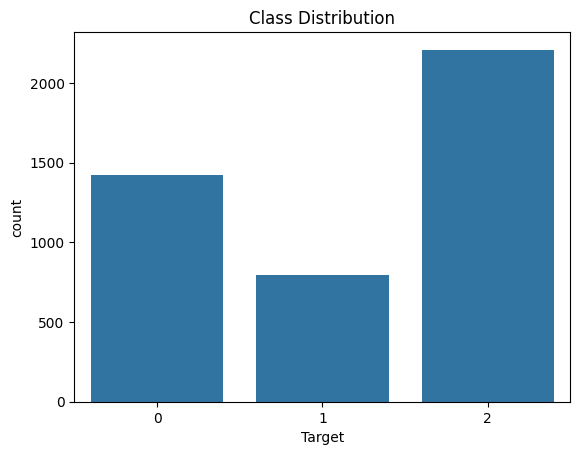

In [ ]:
# Distribution of the target variable
sns.countplot(x='Target', data=data)
plt.title('Class Distribution')
plt.show()


### **3.2 Bivariate Analysis**  

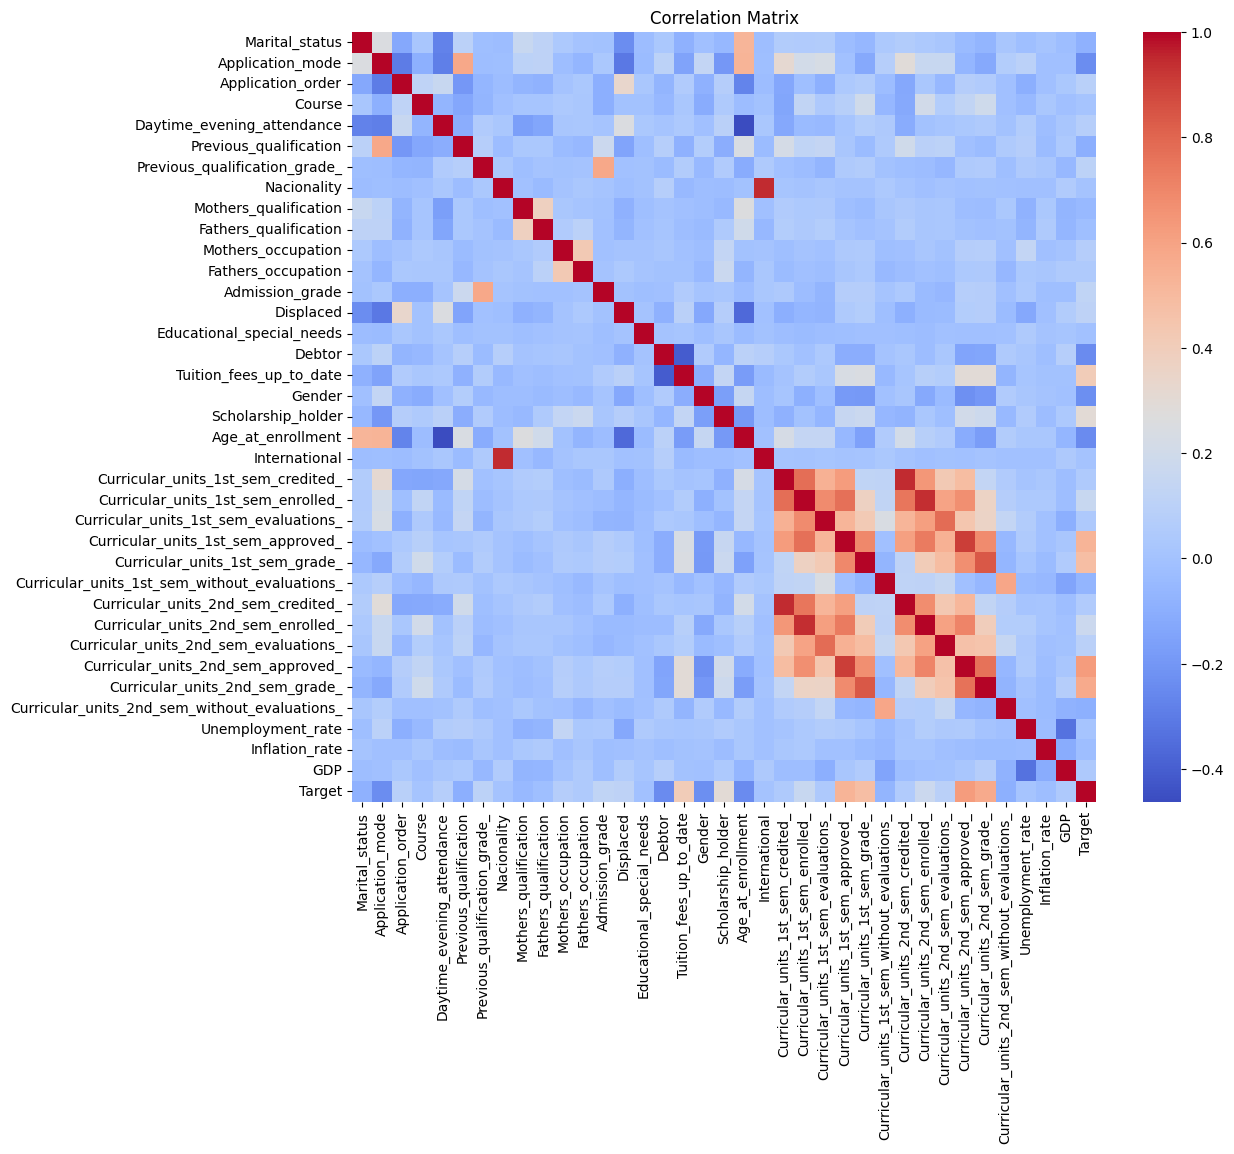

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,10))
correlation = data.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### **3.3 Feature Relationships**  

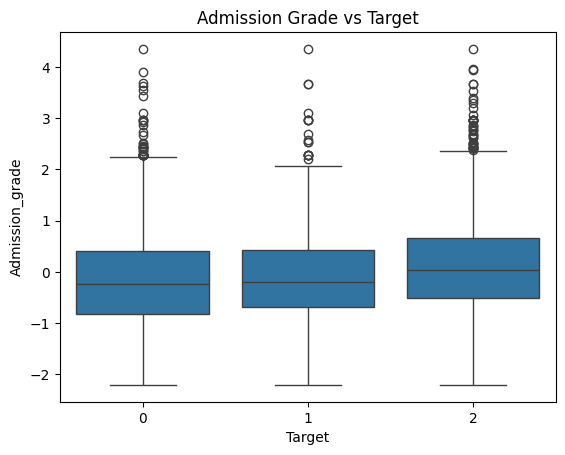

In [ ]:
# Boxplot of Admission Grade by Target
sns.boxplot(x='Target', y='Admission_grade', data=data)
plt.title('Admission Grade vs Target')
plt.show()


## **4. Handling Class Imbalance**  
### **4.1 Analyze Class Distribution**

In [ ]:
# Count of each class
data['Target'].value_counts()


,count
Target,
2,2209
0,1421
1,794


### **4.2 Resampling Techniques**  
Using techniques like SMOTE for oversampling minority classes.

In [ ]:
# Separate features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


## **5. Feature Engineering and Selection**  
### **5.1 Feature Importance**  
Use a tree-based model to determine feature importance.

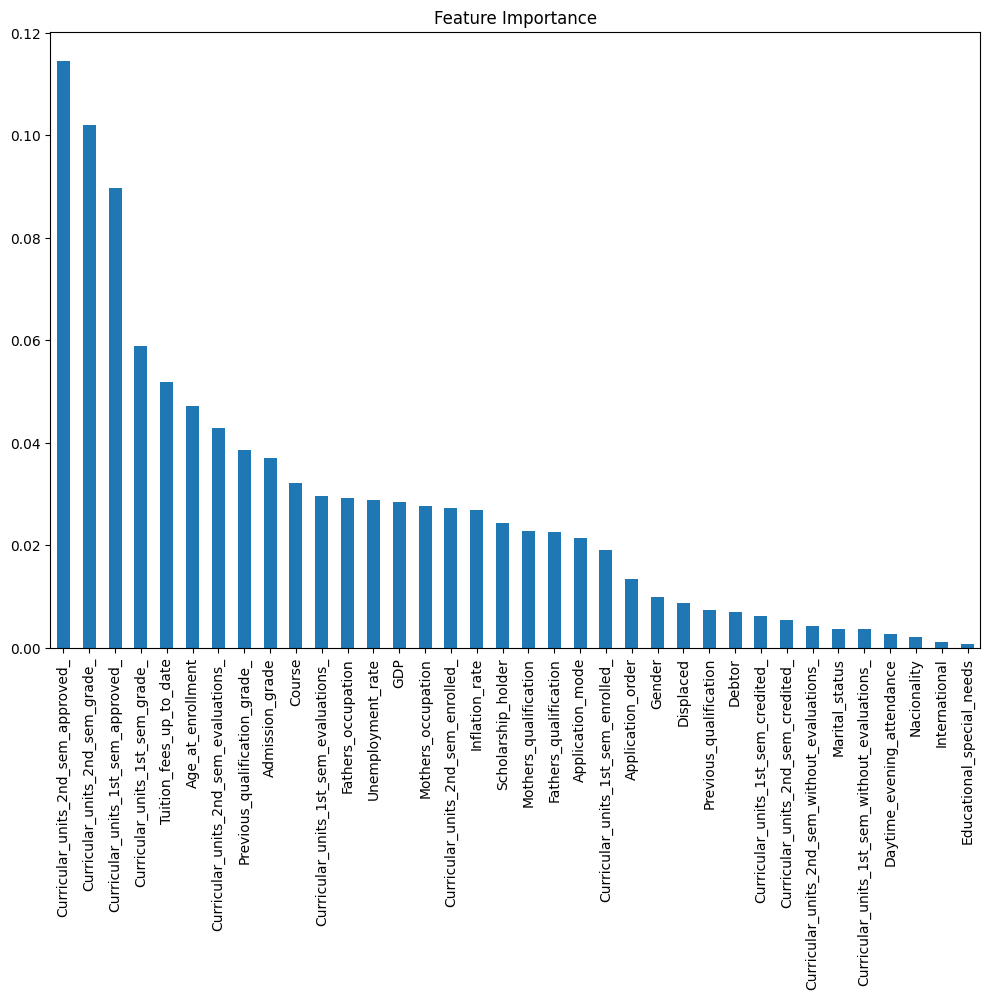

In [ ]:
# Random Forest for feature importance
rf_feature = RandomForestClassifier(random_state=42)
rf_feature.fit(X_resampled, y_resampled)

# Get feature importances
importances = rf_feature.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12,8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


## **6. Model Building**  
### **6.1 Split the Data**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)



### **6.2 Basic Models**  
#### **6.2.1 Logistic Regression**

In [ ]:
# Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

#### **6.2.2 Decision Tree**  

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)


#### **6.3.1 Random Forest**

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### **6.3.2 Support Vector Machine**

In [ ]:
# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

#### **6.3.3 Neural Network**

In [ ]:
# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)


### **7. Model Evaluation**  
#### **7.1 Evaluate Models**  

Define a function to evaluate models.

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



#### **7.2 Logistic Regression Evaluation**  

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       442
           1       0.68      0.65      0.66       442
           2       0.76      0.84      0.80       442

    accuracy                           0.74      1326
   macro avg       0.74      0.74      0.74      1326
weighted avg       0.74      0.74      0.74      1326



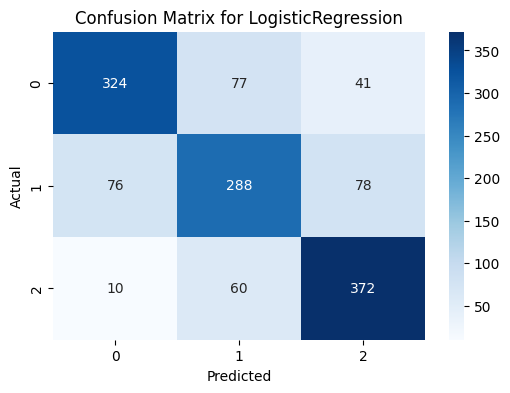

In [ ]:
evaluate_model(lr, X_test, y_test)



#### **7.3 Decision Tree Evaluation**

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       442
           1       0.69      0.73      0.71       442
           2       0.73      0.71      0.72       442

    accuracy                           0.73      1326
   macro avg       0.73      0.73      0.73      1326
weighted avg       0.73      0.73      0.73      1326



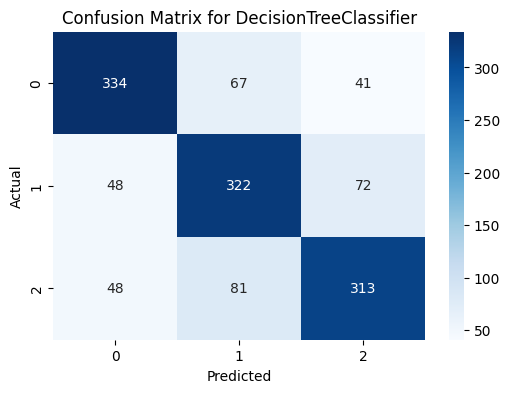

In [ ]:
evaluate_model(dt, X_test, y_test)



#### **7.4 Random Forest Evaluation**

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       442
           1       0.79      0.77      0.78       442
           2       0.79      0.87      0.83       442

    accuracy                           0.81      1326
   macro avg       0.81      0.81      0.81      1326
weighted avg       0.81      0.81      0.81      1326



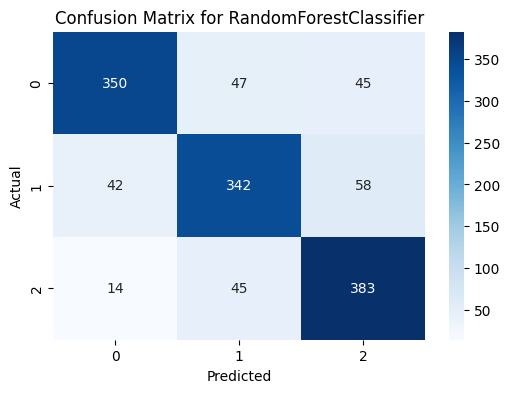

In [ ]:
evaluate_model(rf, X_test, y_test)


#### **7.5 SVM Evaluation**

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.55      0.66       442
           1       0.57      0.64      0.61       442
           2       0.66      0.80      0.72       442

    accuracy                           0.66      1326
   macro avg       0.69      0.66      0.66      1326
weighted avg       0.69      0.66      0.66      1326



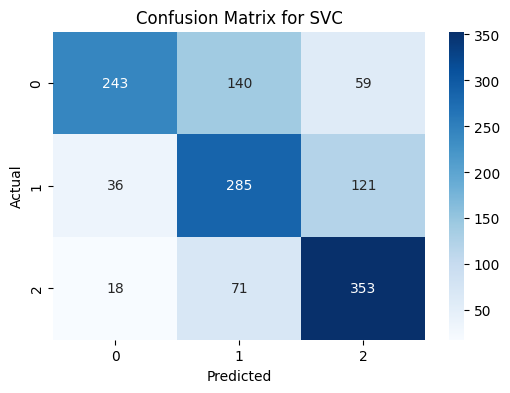

In [ ]:
evaluate_model(svm, X_test, y_test)



#### **7.6 Neural Network Evaluation**

Model: MLPClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       442
           1       0.78      0.56      0.65       442
           2       0.70      0.92      0.79       442

    accuracy                           0.75      1326
   macro avg       0.76      0.75      0.74      1326
weighted avg       0.76      0.75      0.74      1326



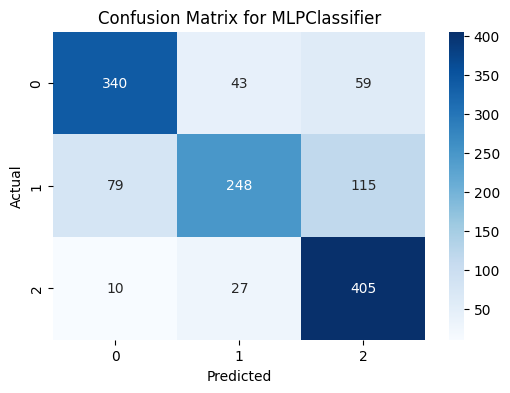

In [ ]:
evaluate_model(mlp, X_test, y_test)



### **8. Hyperparameter Tuning**  
#### **8.1 Grid Search for Random Forest**

In [ ]:
# Parameters to try
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,
    scoring='f1_macro'
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_


Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}



#### **8.2 Evaluate Tuned Random Forest**

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83       442
           1       0.79      0.77      0.78       442
           2       0.79      0.87      0.83       442

    accuracy                           0.81      1326
   macro avg       0.81      0.81      0.81      1326
weighted avg       0.81      0.81      0.81      1326



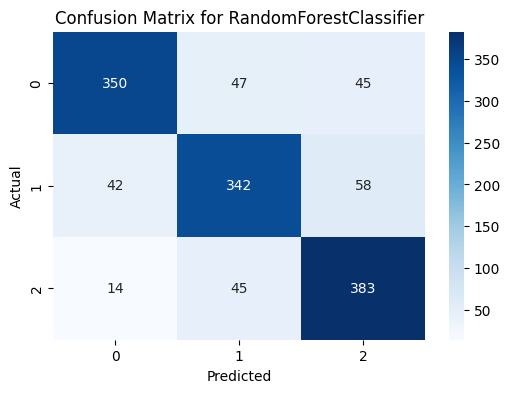

In [ ]:
evaluate_model(best_rf, X_test, y_test)


## **Conclusion**  
In this project, we successfully built and evaluated machine learning models to predict student outcomes—**Dropout**, **Enrolled**, and **Graduate**—using the dataset from a higher education institution. A detailed machine learning pipeline was implemented, including data preprocessing, class imbalance handling with SMOTE, feature importance analysis, and model evaluation.

The **Random Forest** model achieved the best performance, showcasing its ability to capture the complexities of the dataset. Key findings, insights, and model comparisons are provided in the report. For a **detailed analysis**, including exploratory data analysis (EDA), feature relationships, and model evaluations, please refer to the full report.

---

## **Future Work**  
1. **Hyperparameter Tuning for Other Models:** Extend grid search and optimization for models like SVM and Neural Networks.  
2. **Feature Engineering:** Introduce new features, such as progression rates and cumulative performance metrics, to improve predictive accuracy.  
3. **Advanced Models:** Implement ensemble techniques such as XGBoost, LightGBM, or stacking methods to further enhance results.  
4. **Interpretability:** Use explainability tools like SHAP or LIME to gain deeper insights into model predictions and their real-world implications.  
5. **Early Prediction:** Focus on early-semester data to identify at-risk students sooner for timely interventions.

---

## **Project Team**  
- **Arsalan Khan** *(210862640)*  
- **Aliha Ali** *(210184090)*  

---

## **References**  
1. Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho (2021). *Early prediction of student's performance in higher education: A case study*. Published in Trends and Applications in Information Systems and Technologies.  
2. UCI Machine Learning Repository: [Predict Students' Dropout and Academic Success Dataset](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success).  

---
